# Classifying price range for jewelry - Modeling 

## Capstone Project One: Springboard Data Science Career track 

### Notebook by Rupal Gandhre




### Introduction: 
The Jewelry industry has a potential to benefit from data and advanced analytics. Many of the retail industry are already leveraging the benefits. These days most of the sales have been through ecommerce websites. Even I have bought jewelry online!! 

####    Goal:
The goal of this project is to classify price range for jewelry based on the features of jewelry. The features include 
1. Metal of jewelry (18K Gold, 14K Gold, Sterling Silver)
2. Type of Stone(Diamond or Gemstones)
3. Color of the Stone
4. Cut of the Stone 
5. Carat weight of the Stone

This model may help the client to get a price range for the custom jewelry.


####  The Data:

Data is web-scrapped from one of the leading jewelry brand using BeautifulSoup. I am thankful to the web developers for not implementing a script to block my nuisance of an IP address.




#### Import the necessary libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
#used for expanding the no o viible columns of dataframe



#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [2]:
#filename = "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/diamonds.csv"
#df_diamondrings = pd.read_csv(filename)

In [3]:
filename= "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/processed/Preprocessing_Diamond_Rings.csv"
df = pd.read_csv(filename)

In [4]:
df.isnull().sum()

Description                             0
Discount_Price                          0
Metal                                   0
Metal_Color                             0
Stones                                  0
Jewelry_Type                            0
Product_Carat                           0
Stone1_Desc                             0
Price                                   0
Price_Category                          0
Stone1_Stone                            0
Stone1_Carat                            0
stone1_carat_under_0.5                  0
stone1_carat_above_0.5_and_under_1.0    0
stone1_carat_above_1.0_and_under_1.5    0
stone1_carat_above_1.5_and_under_2.0    0
stone1_carat_above_2.0_and_under_2.5    0
stone1_carat_above_2.5_and_under_3.0    0
stone1_carat_above_3.0_and_under_3.5    0
stone1_carat_above_3.5_and_under_4.0    0
stone1_carat_above_4.0_and_under_4.5    0
stone1_carat_above_4.5                  0
Stone1_Color                            0
Stone1_Color_Blue                 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Description                           554 non-null    object 
 1   Discount_Price                        554 non-null    float64
 2   Metal                                 554 non-null    object 
 3   Metal_Color                           554 non-null    object 
 4   Stones                                554 non-null    object 
 5   Jewelry_Type                          554 non-null    object 
 6   Product_Carat                         554 non-null    float64
 7   Stone1_Desc                           554 non-null    object 
 8   Price                                 554 non-null    int64  
 9   Price_Category                        554 non-null    object 
 10  Stone1_Stone                          554 non-null    object 
 11  Stone1_Carat       

In [6]:
df_diamondrings = df.drop(columns=['Description', 'Discount_Price', 'Metal',
                                                'Metal_Color', 'Stones','Jewelry_Type',
                                                'Product_Carat', 'Stone1_Desc', 'Price',
                                                'Stone1_Stone','Stone1_Carat','Stone1_Color',
                                                'Stone1_Cut'])

In [7]:
df_diamondrings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Price_Category                        554 non-null    object
 1   stone1_carat_under_0.5                554 non-null    int64 
 2   stone1_carat_above_0.5_and_under_1.0  554 non-null    int64 
 3   stone1_carat_above_1.0_and_under_1.5  554 non-null    int64 
 4   stone1_carat_above_1.5_and_under_2.0  554 non-null    int64 
 5   stone1_carat_above_2.0_and_under_2.5  554 non-null    int64 
 6   stone1_carat_above_2.5_and_under_3.0  554 non-null    int64 
 7   stone1_carat_above_3.0_and_under_3.5  554 non-null    int64 
 8   stone1_carat_above_3.5_and_under_4.0  554 non-null    int64 
 9   stone1_carat_above_4.0_and_under_4.5  554 non-null    int64 
 10  stone1_carat_above_4.5                554 non-null    int64 
 11  Stone1_Color_Blue               

## Applying the Machine Learning models:


Following classification models are used:
1. Logistic Regression
2. Random Forest
3. Stochastic Gradient Descent
4. K-Nearest Neighbor(KNN)


Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part. 

Since the dataset is not too large, GridSearchCV is used for hyperparameter tuning. GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.


Evaluation of the Model is done using Confusion Matrix and Classification Report


In [8]:
#Data is split features and target variable

X = df_diamondrings.drop(columns='Price_Category')
y = df_diamondrings.Price_Category

In [9]:
#Convert Categorical data to integer data using One Hot Encoding

#df_dummy_rings = pd.get_dummies(X)
#df_dummy_rings.shape

In [10]:
#List of the columns after one hot encoding
#print(df_dummy_rings.columns.tolist())

In [11]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=47)

In [12]:
X_train.shape, X_test.shape

((387, 20), (167, 20))

## Logistic Regression For Diamonds dataset


In [13]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#LogisticRegression with a random state of 47

from sklearn.linear_model import LogisticRegression


LR_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
lr_default_cv_results = cross_validate(LR_pipe, X_train, y_train, cv=3)
lr_cv_scores = lr_default_cv_results['test_score']

print("Cross Validation Train Score: ",lr_cv_scores)
print('Mean Cross Validation train score: ', np.mean(lr_cv_scores))
print('Standard deviation CV train score: ', np.std(lr_cv_scores))

Cross Validation Train Score:  [0.34108527 0.33333333 0.41085271]
Mean Cross Validation train score:  0.3617571059431524
Standard deviation CV train score:  0.034859786985095724


## Hyperparameter tuning for Logistic Regression using GridSearchCV

In [14]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#print the best parameters
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with:%r" % (mean, stdev, param))

Best: 0.377261 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


## Fitting the Logistic Regression with the optimal hyperparameters



Train Accuracy Scores:  [0.34883721 0.31007752 0.41860465]
Mean Cross Validation train score:  0.3591731266149871
Standard deviation CV train score:  0.04490477311881853


Test Accuracy Scores:  [0.41071429 0.41071429 0.4       ]
Mean Cross Validation train score:  0.4071428571428572
Standard deviation CV train score:  0.005050762722761035


Precision Score:  0.3611524609843938
Recall Score: 0.4036973378588286


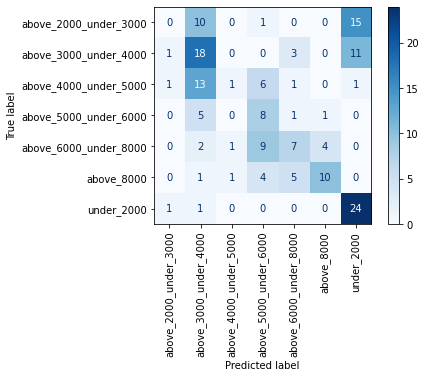



                       precision    recall  f1-score   support

above_2000_under_3000       0.00      0.00      0.00        26
above_3000_under_4000       0.36      0.55      0.43        33
above_4000_under_5000       0.33      0.04      0.08        23
above_5000_under_6000       0.29      0.53      0.37        15
above_6000_under_8000       0.41      0.30      0.35        23
           above_8000       0.67      0.48      0.56        21
           under_2000       0.47      0.92      0.62        26

             accuracy                           0.41       167
            macro avg       0.36      0.40      0.34       167
         weighted avg       0.36      0.41      0.34       167



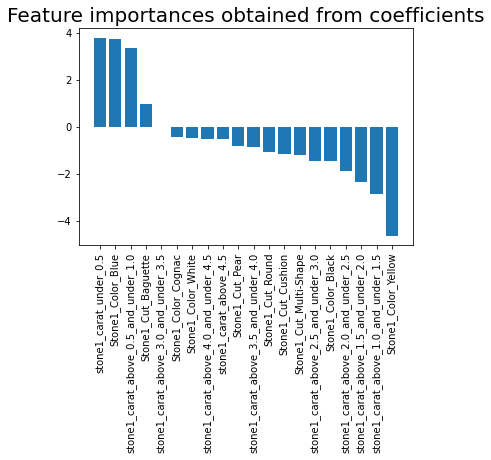

In [15]:
#Use the best parameters found 

logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

from sklearn.model_selection import cross_val_score

logr_train_scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')

print('\n')
print("Train Accuracy Scores: ", logr_train_scores)
print('Mean Cross Validation train score: ', np.mean(logr_train_scores))
print('Standard deviation CV train score: ', np.std(logr_train_scores))

#Predict the test data 
y_pred = logr.predict(X_test)

logr_test_scores = cross_val_score(logr,X_test,y_test,cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", logr_test_scores)
print('Mean Cross Validation train score: ', np.mean(logr_test_scores))
print('Standard deviation CV train score: ', np.std(logr_test_scores))

from sklearn.metrics import precision_score, recall_score

precision_lr = precision_score(y_test, y_pred, average='macro')
recall_lr = recall_score(y_test,y_pred, average='macro')
print('\n')
print('Precision Score: ', precision_lr)
print('Recall Score:', recall_lr)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

from sklearn.metrics import classification_report

print('\n')
print(classification_report(y_test, y_pred))

plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest Model For Diamond Data Set

In [16]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#RandomForestClassifier with a random state of 47

from sklearn.ensemble import RandomForestClassifier

RF_pipe = make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            RandomForestClassifier(random_state=47))

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",rf_cv_scores)
print('Mean Cross Validation train score: ', np.mean(rf_cv_scores))
print('Standard deviation CV train score: ', np.std(rf_cv_scores))

Cross Validation Train Score:  [0.3875969  0.3255814  0.41085271]
Mean Cross Validation train score:  0.37467700258397935
Standard deviation CV train score:  0.0359906673829047


## Hyperparameter tuning for Random Forest using GridSearchCV

In [17]:
#Setting the grid parameters

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'randomforestclassifier__criterion': ['entropy','gini'],
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', rf_grid_cv.best_params_ )

rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ",rf_best_scores)
print('Mean Cross Validation train score: ', np.mean(rf_best_scores))
print('Standard deviation CV train score: ', np.std(rf_best_scores))



Best Parameters:
  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 26, 'simpleimputer__strategy': 'mean', 'standardscaler': StandardScaler()}


Cross Validation Train Score:  [0.39534884 0.3255814  0.41860465]
Mean Cross Validation train score:  0.3798449612403101
Standard deviation CV train score:  0.03952728305110685


## Fitting the Random Forest Classifier with the optimal hyperparameters



The Accuracy score of Random Forest prediction:  0.3592814371257485
Precision Score:  0.38525030525030524
Recall Score:  0.3671078403997659


                       precision    recall  f1-score   support

above_2000_under_3000       0.33      0.04      0.07        26
above_3000_under_4000       0.44      0.12      0.19        33
above_4000_under_5000       0.25      0.52      0.34        23
above_5000_under_6000       0.16      0.27      0.20        15
above_6000_under_8000       0.40      0.26      0.32        23
           above_8000       0.67      0.48      0.56        21
           under_2000       0.44      0.88      0.59        26

             accuracy                           0.36       167
            macro avg       0.39      0.37      0.32       167
         weighted avg       0.40      0.36      0.32       167



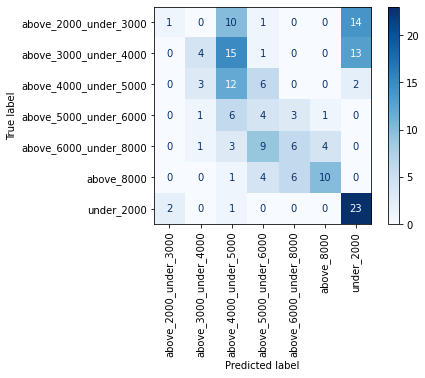

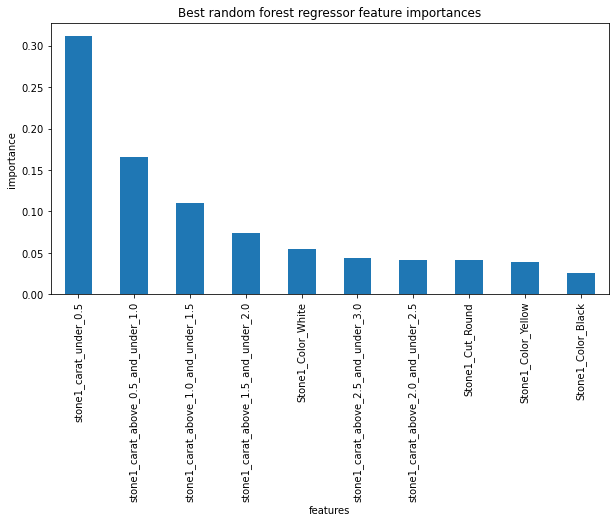

In [18]:

#Predict on the test data

rf_clf = rf_grid_cv.best_estimator_

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test,y_pred_rf, average='macro')
print('\n')
print('The Accuracy score of Random Forest prediction: ',accuracy_score(y_test, y_pred_rf))
print('Precision Score: ', precision_rf)
print('Recall Score: ', recall_rf)

print('\n')
print(classification_report(y_test, y_pred_rf))


plot_confusion_matrix(rf_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');
plt.show()


## Stochastic Gradient Descent (SGD) for the Diamond DataSet

Train Accuracy Scores:  [0.3875969  0.31007752 0.42635659]
Mean Cross Validation train score:  0.37467700258397935
Standard deviation CV train score:  0.0483418267025057


Test Accuracy Scores:  [0.32142857 0.25       0.16363636]
Mean Cross Validation test score:  0.245021645021645
Standard deviation CV test score:  0.06451451115164043


Precision Score:  0.2236887508626639
Recall Score: 0.2955015998494259


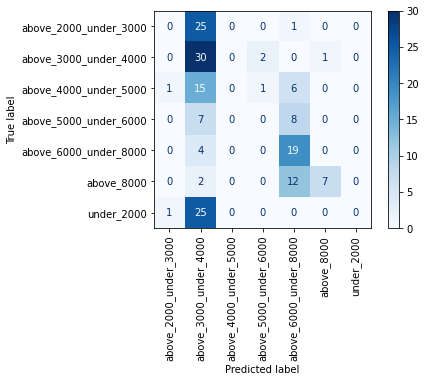



                       precision    recall  f1-score   support

above_2000_under_3000       0.00      0.00      0.00        26
above_3000_under_4000       0.28      0.91      0.43        33
above_4000_under_5000       0.00      0.00      0.00        23
above_5000_under_6000       0.00      0.00      0.00        15
above_6000_under_8000       0.41      0.83      0.55        23
           above_8000       0.88      0.33      0.48        21
           under_2000       0.00      0.00      0.00        26

             accuracy                           0.34       167
            macro avg       0.22      0.30      0.21       167
         weighted avg       0.22      0.34      0.22       167



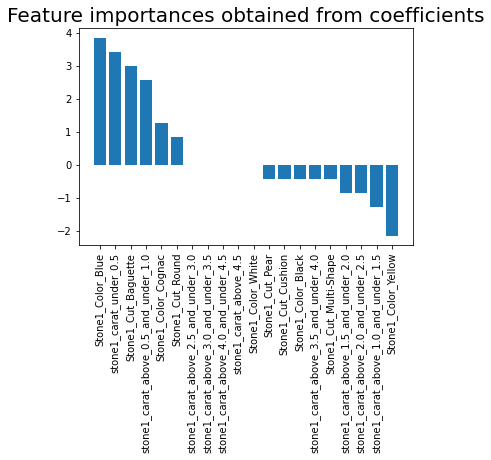

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_train_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring='accuracy')

print("Train Accuracy Scores: ", sgd_train_scores)
print('Mean Cross Validation train score: ', np.mean(sgd_train_scores))
print('Standard deviation CV train score: ', np.std(sgd_train_scores))

sgd_test_scores = cross_val_score(sgd_clf, X_test, y_test, cv=3,scoring='accuracy')
print('\n')
print("Test Accuracy Scores: ", sgd_test_scores)
print('Mean Cross Validation test score: ', np.mean(sgd_test_scores))
print('Standard deviation CV test score: ', np.std(sgd_test_scores))

y_pred_sgd = sgd_clf.predict(X_test)

precision_sgd = precision_score(y_test, y_pred_sgd, average='macro')
recall_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('\n')
print('Precision Score: ', precision_sgd)
print('Recall Score:', recall_sgd)

plot_confusion_matrix(sgd_clf, X_test, y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()
print('\n')
print(classification_report(y_test, y_pred_sgd))

importances_sgd = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':sgd_clf.coef_[0]})
importances_sgd = importances_sgd.sort_values(by='Importance',ascending=False)

plt.bar(x=importances_sgd['Attribute'][:30], height=importances_sgd['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


## KNeighbors Classifer for the Diamond DataSet

In [20]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#KNeighborsClassifier with a random state of 47

from sklearn.neighbors import KNeighborsClassifier

#knn_clf = KNeighborsClassifier()
#knn_clf.fit(X_train, y_train)
#y_pred_knn = knn_clf.predict(X_test)

knn_pipe = make_pipeline(KNeighborsClassifier())

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 3-fold cross-validation
knn_default_cv_results = cross_validate(knn_pipe, X_train, y_train, cv=3)
knn_cv_scores = rf_default_cv_results['test_score']

print("Cross Validation Train Score: ",knn_cv_scores)
print('Mean Cross Validation train score: ', np.mean(knn_cv_scores))
print('Standard deviation CV train score: ', np.std(knn_cv_scores))


Cross Validation Train Score:  [0.3875969  0.3255814  0.41085271]
Mean Cross Validation train score:  0.37467700258397935
Standard deviation CV train score:  0.0359906673829047


### Hyperparameter tuning for KNN using GridSearchCV

In [21]:
#Setting the grid parameters

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_clf = KNeighborsClassifier()
#grid_params

#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 3-fold cross-validation, and all available CPU cores (if desired)
knn_grid_cv = GridSearchCV(knn_clf, param_grid=grid_params, cv=3, n_jobs=-1)

#Call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. 
knn_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
print('Best Parameters:\n ', knn_grid_cv.best_params_ )

knn_best_cv_results = cross_validate(knn_grid_cv.best_estimator_, X_train, y_train, cv=3)
knn_best_scores = knn_best_cv_results['test_score']

print('\n')
print("Cross Validation Train Score: ", knn_best_scores)
print('Mean Cross Validation train score: ', np.mean(knn_best_scores))
print('Standard deviation CV train score: ', np.std(knn_best_scores))



Best Parameters:
  {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}


Cross Validation Train Score:  [0.3875969  0.33333333 0.37209302]
Mean Cross Validation train score:  0.3643410852713178
Standard deviation CV train score:  0.02282108750989109


#### Fitting the KNN Classifier with the optimal hyperparameters



The Accuracy score of KNN prediction:  0.3592814371257485
Precision Score:  0.3754905808477237
Recall Score:  0.36785698773276415


                       precision    recall  f1-score   support

above_2000_under_3000       0.23      0.42      0.30        26
above_3000_under_4000       0.33      0.09      0.14        33
above_4000_under_5000       0.25      0.04      0.07        23
above_5000_under_6000       0.23      0.40      0.29        15
above_6000_under_8000       0.50      0.30      0.38        23
           above_8000       0.64      0.43      0.51        21
           under_2000       0.44      0.88      0.59        26

             accuracy                           0.36       167
            macro avg       0.38      0.37      0.33       167
         weighted avg       0.38      0.36      0.32       167



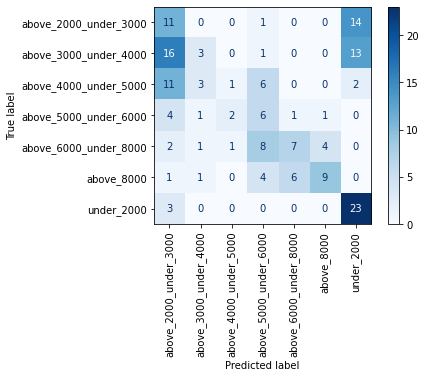

In [22]:

#Predict on the test data

knn_clf = knn_grid_cv.best_estimator_

y_pred_knn = knn_clf.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test,y_pred_knn, average='macro')
print('\n')
print('The Accuracy score of KNN prediction: ',accuracy_score(y_test, y_pred_knn))
print('Precision Score: ', precision_knn)
print('Recall Score: ', recall_knn)

print('\n')
print(classification_report(y_test, y_pred_knn))


plot_confusion_matrix(knn_grid_cv, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()


## Comparing the models

In [23]:
Labels = [ 'Logistic Regression','Random Forest','Stochastic Gradient Descent', 'KNN']

#roc_lr = roc_auc_score(y_test, logr.predict_proba(X_test), multi_class='ovr')
#roc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr')
#roc_sgd = roc_auc_score(y_test, sgd_clf.predict_proba(X_test), multi_class='ovr')
#roc_sgd =0
#roc_knn = roc_auc_score(y_test, knn_clf.predict_proba(X_test), multi_class='ovr')
#roc_test = [roc_lr,roc_rf,roc_sgd,roc_knn]

precision_test = [precision_lr, precision_rf,precision_sgd,precision_knn]
recall_test =[recall_lr, recall_rf,recall_sgd,recall_knn]


matrix = pd.DataFrame(list(zip(Labels, precision_test, recall_test)), 
               columns =['Algorithm', 'Precision Score', 'Recall Score']) 
print(matrix)



                     Algorithm  Precision Score  Recall Score
0          Logistic Regression         0.361152      0.403697
1                Random Forest         0.385250      0.367108
2  Stochastic Gradient Descent         0.223689      0.295502
3                          KNN         0.375491      0.367857


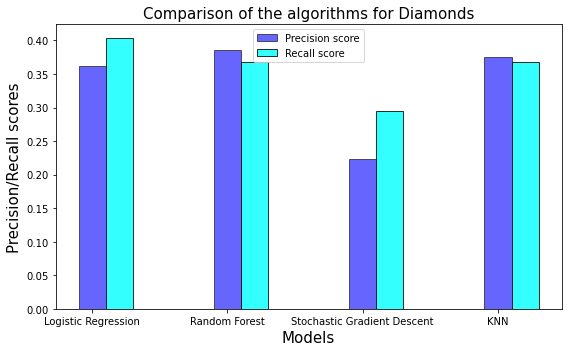

In [24]:
#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4]
index_acc=[1.2,2.2,3.2,4.2]
plt.figure(figsize=(8,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision/Recall scores',fontsize=15)
plt.title('Comparison of the algorithms for Diamonds',fontsize=15)
_=plt.bar(index, precision_test,color='b',alpha=0.6,label='Precision score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,recall_test,color='cyan',alpha=0.8,label='Recall score',edgecolor='k',width=0.2)

#_=plt.bar(index,precision_test)
plt.xticks([1,2,3,4], Labels)
plt.legend()
plt.tight_layout()
plt.savefig("27.png")
plt.show()

### Save the best model from the pipeline

In [35]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
from sklearn import __version__ as sklearn_version
import datetime
import os 
import pickle


best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [33]:
import pickle 

modelpath = "/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/models/diamond_rings_pricing_model.pkl"
pickle.dump(best_model, open(modelpath, 'wb'))



#### Conclusion:

The classification models were evaluated based on the precision and recall score. 

With the currently availabel dataset,the precision score for Random Forest is 0.3852502 and thus is selected as the best model. 

With more diverse and accurate data, the model may predict better results. 

#### Future Work:

Future Work:
The model has a lot of room for improvement.

1.Get more accurate and diverse data for all jewelry types

2.In-depth analysis and modeling was done only for rings.

3.Data for other jewelry types needs to be analyzed, explored and modelled.

4.Due to limited data available on the product features, predictive sales price could not be done. If available, analyze more financial data to predict the sales of the company.